In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [14]:
class Ising:
    def __init__(self, N, T):
        self.N = N
        self.T = T
        self.current_state = np.random.choice([-1,1], size=N**2)
        self.current_state = self.current_state.reshape((N,N))
        
    def observe (self):
        plt.imshow(self.current_state)
        plt.show()
        
    def step(self): 
        row = np.random.randint(0, self.N, size=1)
        col = np.random.randint(0, self.N, size=1)
        energy = -(self.current_state[row, col]*self.current_state[(row+1)%self.N, col] + 
                   self.current_state[row, col]*self.current_state[(row-1)%self.N, col] +
                   self.current_state[row, col]*self.current_state[row, (col+1)%self.N] +
                   self.current_state[row, col]*self.current_state[row, (col+1)%self.N]) 
        if np.random.random() < min(1, np.exp(2*energy/self.T)):            
            self.current_state[row, col] = -self.current_state[row, col]
            
    def average(self):
        a_mag = np.sum(self.current_state.flatten())/self.N**2
        return a_mag

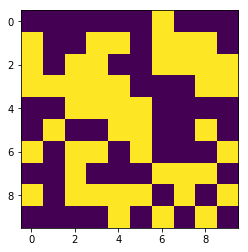

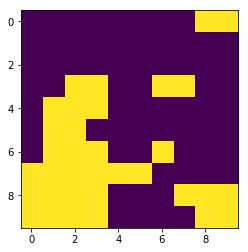

Average magnetization 1: -0.320000


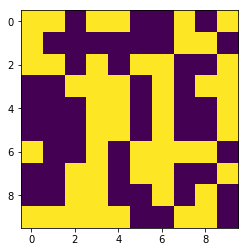

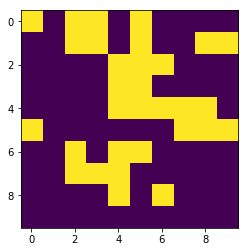

Average magnetization 2: -0.380000


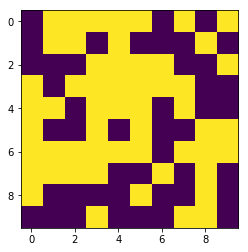

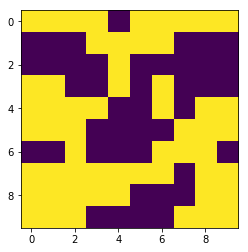

Average magnetization 3: 0.140000


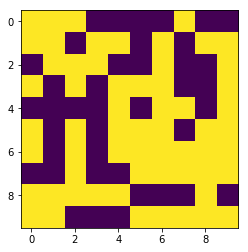

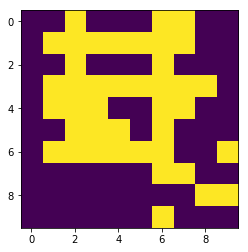

Average magnetization 4: -0.180000


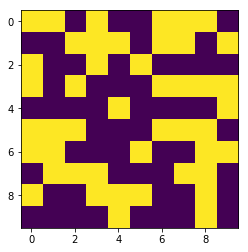

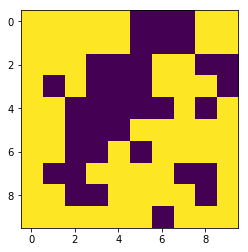

Average magnetization 5: 0.280000


In [13]:
average = []
for i in range (1,6):
    sim = Ising(10, 3)
    sim.observe()
    for _ in range(100000): 
        sim.step()
    sim.observe()
    sim.average()
    average.append (sim.average)
    print ("Average magnetization %i: %f" % (i, sim.average()))